# Image Augmentation Like a Pro!

In [1]:
!wget https://images-americanas.b2w.io/produtos/01/00/img/1474047/1/1474047100_1SZ.jpg
!wget https://images-americanas.b2w.io/produtos/01/00/img/1474047/1/1474047100_3SZ.jpg

--2020-08-24 10:19:52--  https://images-americanas.b2w.io/produtos/01/00/img/1474047/1/1474047100_1SZ.jpg
Resolving images-americanas.b2w.io (images-americanas.b2w.io)... 179.191.188.6, 179.191.189.16, 179.191.187.6, ...
Connecting to images-americanas.b2w.io (images-americanas.b2w.io)|179.191.188.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80954 (79K) [image/jpeg]
Saving to: ‘1474047100_1SZ.jpg’

1474047100_1SZ.jpg  100%[===================>]  79.06K  --.-KB/s    in 0.08s   

2020-08-24 10:19:53 (1001 KB/s) - ‘1474047100_1SZ.jpg’ saved [80954/80954]

--2020-08-24 10:19:53--  https://images-americanas.b2w.io/produtos/01/00/img/1474047/1/1474047100_3SZ.jpg
Resolving images-americanas.b2w.io (images-americanas.b2w.io)... 179.191.188.6, 179.191.189.16, 179.191.187.6, ...
Connecting to images-americanas.b2w.io (images-americanas.b2w.io)|179.191.188.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207360 (202K) [image/jpeg]
Saving t

In [3]:
!pip3 install tensorflow_addons --quiet

In [7]:
import tensorflow as tf
import tensorflow_addons as tfa
from matplotlib import pyplot as plt

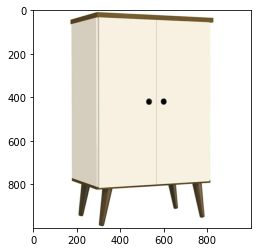

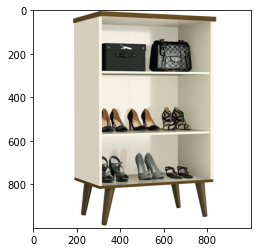

In [8]:
img1 = tf.io.decode_image(tf.io.gfile.GFile("1474047100_1SZ.jpg", "rb").read())
img2 = tf.io.decode_image(tf.io.gfile.GFile("1474047100_3SZ.jpg", "rb").read())
imgs = tf.stack([img1, img2])

for img in imgs:
    plt.imshow(img)
    plt.show()

230


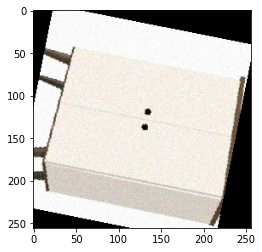

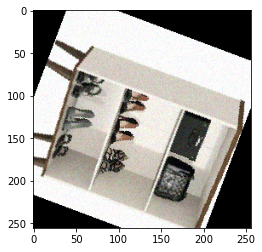

In [171]:
import random

IMAGE_SIZE = [256, 256]

def random_crop_image_squares(imgs, minval=224, maxval=256, ouput_size=IMAGE_SIZE):
    print(minval)
    def map_fn(img):
        size = random.randrange(minval, maxval)
        img = tf.image.random_crop(img, [size, size, 3])
        return tf.image.resize(img, ouput_size)

    return tf.map_fn(map_fn, imgs, dtype=imgs.dtype, parallel_iterations=tf.shape(imgs)[0])

def gaussian_noise_images(imgs,  mean=0.0, stddev=1.0):
    noise = tf.random.normal(shape=tf.shape(imgs), mean=mean, stddev=stddev, dtype=tf.float32)
    return tf.clip_by_value(imgs + noise, 0, 255)


def aug(imgs):
    _length = tf.shape(imgs)[0]
    
    _imgs = tf.image.resize(imgs, IMAGE_SIZE)
    _imgs = tf.image.random_flip_left_right(_imgs)
    _imgs = tf.image.random_hue(_imgs, 0.08)
    _imgs = tf.image.random_saturation(_imgs, 0.1, 1.6)
    _imgs = tf.image.random_brightness(_imgs, 0.1)
    _imgs = tf.image.random_contrast(_imgs, 0.7, 1.3)
    _imgs = random_crop_image_squares(_imgs, minval=int(IMAGE_SIZE[0] * 0.9), maxval=IMAGE_SIZE[0], ouput_size=IMAGE_SIZE)
    _imgs = gaussian_noise_images(_imgs, mean=0.0, stddev=10.0)
    
    _imgs = tfa.image.translate(_imgs, tf.random.uniform(shape=[_length, 2], minval=-int(IMAGE_SIZE[0] * 0.1), maxval=int(IMAGE_SIZE[0] * 0.1)))
    _imgs = tfa.image.rotate(_imgs, tf.random.uniform(shape=[_length], minval=-10.0, maxval=10.0))
    
    return _imgs

for img in aug(imgs):
    plt.imshow(tf.cast(img, tf.int32))
    plt.show()